<a href="https://colab.research.google.com/github/dev-researcher/automatas/blob/main/ML_Copy_of_EML_2024_2_Trabajo_Corto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Maestría Académica en Ciencias de la Computación**

**Curso: Electiva Aprendizaje Automático**

**Segundo Semestre 2024**

**Profesor: Dr. Luis-Alexander Calvo-Valverde**

---

**Trabajo Práctico:** 1

**Datos de la entrega:** Miércoles 18 de setiembre 2024, a más tardar a las 6:00 pm

**Medio de entrega**: Por medio del TEC-Digital.

**Entregables**: Un archivo jupyter ( .IPYNB ) y todos los archivos adiconales que se requieran para correr su Cuaderno (En un archivo comprimido)

---

**Estudiantes:**
- Estudiante 1
- Estudiante 2



# Favor leer esto primero.

1. Se le adjunta material sobre Series Temporales en PDF, debe estudiarlo antes de proceder con la solución del presente Trabajo Práctico. Se adjutan los archivos .csv requeridos por si desea  probar el código de dicho material. El código que incluye el material podría requerir alguna modificación por su parte, esto por el conocido proceso de actualización de las bibliotecas.  

1. Usted puede cambiar los archivos de series temporales que se le proporcionan por otras series temporales que sean de su interés; pero de hacerlo, se le recomienda valorarlo con el profesor para que sus series temporales no le agreguen una complicación importante al Trabajo Práctico.

# Parte 1.  Series temporales y graficación

1. **Utilizando el archivo la serie temporal en el archivo: TS_d_1**, realice la presente sección.
1. Complete en celdas de código y/o texto según convenga.
1. Documente bien su código.



In [9]:
from google.colab import files
uploaded = files.upload()


Saving TS_d_3.csv to TS_d_3.csv


### 1.1 **(4 puntos)**
- Cargue el archivo.
- Muestre los cinco primeros registros.
- Muestre qué tipo de datos es la variable  series

In [4]:
import pandas as pd
import io
# Load the file

#In VS Code
#file_path = r"C:\\Users\\arjun\\Downloads\\TP_1\\TS_d_1.csv"
#df = pd.read_csv(file_path)

#In Google Colab
df = pd.read_csv(io.BytesIO(uploaded['TS_d_1.csv']))

# Show the first five records
print("First five records:")
print(df.head())

# Show the type of data the series variable is
print("\nData types of each column:")
print(df.dtypes)

# If you want to check the type of a specific column named 'fecha', you can use:
if 'fecha' in df.columns:
    print("\nType of 'fecha' column:")
    print(type(df['fecha']))
    print(df['fecha'].dtype)
else:
    print("\n'fecha' column not found in the dataset")

First five records:
      fecha  temperatura
0  1/1/2004          5.3
1  2/1/2004          5.6
2  3/1/2004          5.9
3  4/1/2004          6.2
4  5/1/2004          8.4

Data types of each column:
fecha           object
temperatura    float64
dtype: object

Type of 'fecha' column:
<class 'pandas.core.series.Series'>
object


### 1.2 **(4 puntos)**
- Muestra el promedio, la mediana y la desviación estándar de los datos

In [ ]:
import pandas as pd
import io
# Load the file
df =  pd.read_csv(io.BytesIO(uploaded['TS_d_1.csv']))

temperature_column = df.columns[1]

# Calculate and display statistics
print(f"\nStatistics for {temperature_column}:")
print(f"Mean: {df[temperature_column].mean():.2f}")
print(f"Median: {df[temperature_column].median():.2f}")
print(f"Standard Deviation: {df[temperature_column].std():.2f}")

# We can also use the describe() function for a more comprehensive summary
print("\nComprehensive summary of the temperature data:")
print(df[temperature_column].describe())


Statistics for temperatura:
Mean: 8.01
Median: 7.40
Standard Deviation: 3.86

Comprehensive summary of the temperature data:
count    4749.000000
mean        8.013887
std         3.863948
min         1.570000
25%         5.020000
50%         7.400000
75%         9.460000
max        24.200000
Name: temperatura, dtype: float64


### 1.3 **(4 puntos)**
- Muestre el promedio para cada uno de los meses del año. Es decir, el promedio para todos los eneros, luego el promedio para todos los febreros, y así sucevivamente.

In [ ]:
import pandas as pd
import io
# Load the file
df =  pd.read_csv(io.BytesIO(uploaded['TS_d_1.csv']))

date_column = df.columns[0]

temperature_column = df.columns[1]

# Convert the date column to datetime type
df[date_column] = pd.to_datetime(df[date_column],format='mixed', errors='coerce', dayfirst=True)

 # Extract month from the date
df['month'] = df[date_column].dt.month

 # Calculate average temperature for each month
monthly_avg = df.groupby('month')[temperature_column].mean().round(2)

 # Create a dictionary to map month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

 # Display the results
print("Average temperature for each month:")
for month, avg_temp in monthly_avg.items():
    print(f"{month_names[month]}: {avg_temp:.2f}")

Average temperature for each month:
January: 7.69
February: 7.74
March: 7.87
April: 8.52
May: 8.22
June: 7.27
July: 7.71
August: 8.23
September: 8.82
October: 8.50
November: 7.81
December: 7.78


### 1.4 **(4 puntos)**
- Utilizando la técnica de Lag Features, cree un DataFrame con los valores y un Lag=5

In [ ]:
import pandas as pd
import io
# Load the file
df =  pd.read_csv(io.BytesIO(uploaded['TS_d_1.csv']))

date_column = df.columns[0]
temperature_column = df.columns[1]

# Convert the date column to datetime type
df[date_column] = pd.to_datetime(df[date_column],format='mixed', errors='coerce', dayfirst=True)

# Set the date column as the index
df.set_index(date_column, inplace=True)

# Create lag features
max_lag = 5
for i in range(1, max_lag + 1):
    df[f'Lag_{i}'] = df[temperature_column].shift(i)

# Drop rows with NaN values resulting from the lag operation
df_lag = df.dropna()

# Display the first few rows of the resulting DataFrame
print(df_lag.head())

# Display information about the DataFrame
print(df_lag.info())

            temperatura  Lag_1  Lag_2  Lag_3  Lag_4  Lag_5
fecha                                                     
2004-01-06          7.9    8.4    6.2    5.9    5.6    5.3
2004-01-07          7.6    7.9    8.4    6.2    5.9    5.6
2004-01-08          7.7    7.6    7.9    8.4    6.2    5.9
2004-01-09          7.1    7.7    7.6    7.9    8.4    6.2
2004-01-10          6.8    7.1    7.7    7.6    7.9    8.4
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4744 entries, 2004-01-06 to 2016-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperatura  4744 non-null   float64
 1   Lag_1        4744 non-null   float64
 2   Lag_2        4744 non-null   float64
 3   Lag_3        4744 non-null   float64
 4   Lag_4        4744 non-null   float64
 5   Lag_5        4744 non-null   float64
dtypes: float64(6)
memory usage: 259.4 KB
None


### 1.5 **(4 puntos)**
- Utilizando la técnica de rolling window, cree un DataFrame con los valores, y un ancho de ventana de 3. Tenga las columnas: 'mínimo','media','máximo','t+1'

In [ ]:
import pandas as pd
import io
# Load the file
df =  pd.read_csv(io.BytesIO(uploaded['TS_d_1.csv']))

date_column = df.columns[0]
temperature_column = df.columns[1]

# Convert the date column to datetime type
df[date_column] = pd.to_datetime(df[date_column],format='mixed', errors='coerce', dayfirst=True)

# Set the date column as the index
df.set_index(date_column, inplace=True)

# Create a new DataFrame for our rolling window analysis
df_rolling = pd.DataFrame()

# Add the original temperature column
df_rolling['temperature'] = df[temperature_column]

# Calculate rolling statistics
window_size = 3
df_rolling['minimum'] = df[temperature_column].rolling(window=window_size).min()
df_rolling['mean'] = df[temperature_column].rolling(window=window_size).mean()
df_rolling['maximum'] = df[temperature_column].rolling(window=window_size).max()

# Create the 't+1' column (next day's temperature)
df_rolling['t+1'] = df[temperature_column].shift(-1)

# Drop rows with NaN values
df_rolling = df_rolling.dropna()

# Display the first few rows of the resulting DataFrame
print(df_rolling.head())

# Display information about the DataFrame
print(df_rolling.info())

            temperature  minimum      mean  maximum  t+1
fecha                                                   
2004-01-03          5.9      5.3  5.600000      5.9  6.2
2004-01-04          6.2      5.6  5.900000      6.2  8.4
2004-01-05          8.4      5.9  6.833333      8.4  7.9
2004-01-06          7.9      6.2  7.500000      8.4  7.6
2004-01-07          7.6      7.6  7.966667      8.4  7.7
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4746 entries, 2004-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  4746 non-null   float64
 1   minimum      4746 non-null   float64
 2   mean         4746 non-null   float64
 3   maximum      4746 non-null   float64
 4   t+1          4746 non-null   float64
dtypes: float64(5)
memory usage: 222.5 KB
None


### 1.6 **(4 puntos)**
- A la variable series, aplíquele la instrucción series.plot().
- ¿Qué puede decir del comportamiento de los datos según este gráfico?

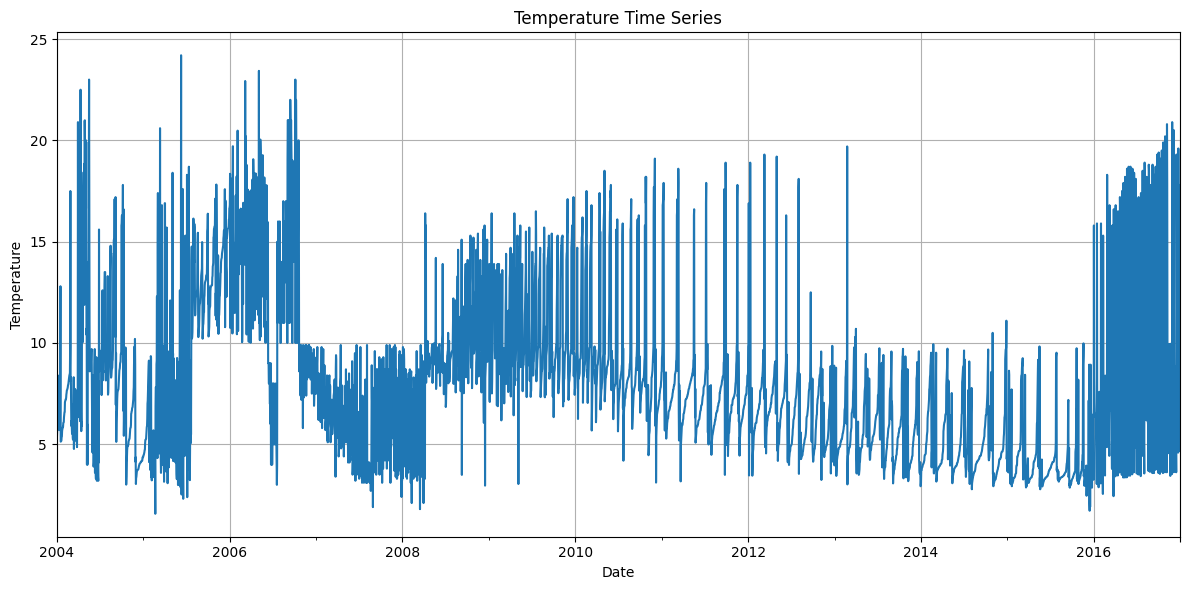

In [5]:
import pandas as pd
import io
import matplotlib.pyplot as plt
# Load the file
df =  pd.read_csv(io.BytesIO(uploaded['TS_d_1.csv']))
date_column = df.columns[0]
temperature_column = df.columns[1]

# Convert the date column to datetime type
df[date_column] = pd.to_datetime(df[date_column],format='mixed', errors='coerce', dayfirst=True)

# Set the date column as the index
df.set_index(date_column, inplace=True)

# Plot the temperature series
plt.figure(figsize=(12, 6))
df[temperature_column].plot()
plt.title('Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()


R/ Se observa una caída notable después dek 2008 y comportamiento periódico entre 20-8 y el 2016.
Aumento rápido al final a partir del 2016.

### 1.7 **(4 puntos)**
- Muestre el histograma de la variable series.
- ¿Qué conclusiones puede sacar del comportamiento de los datos?

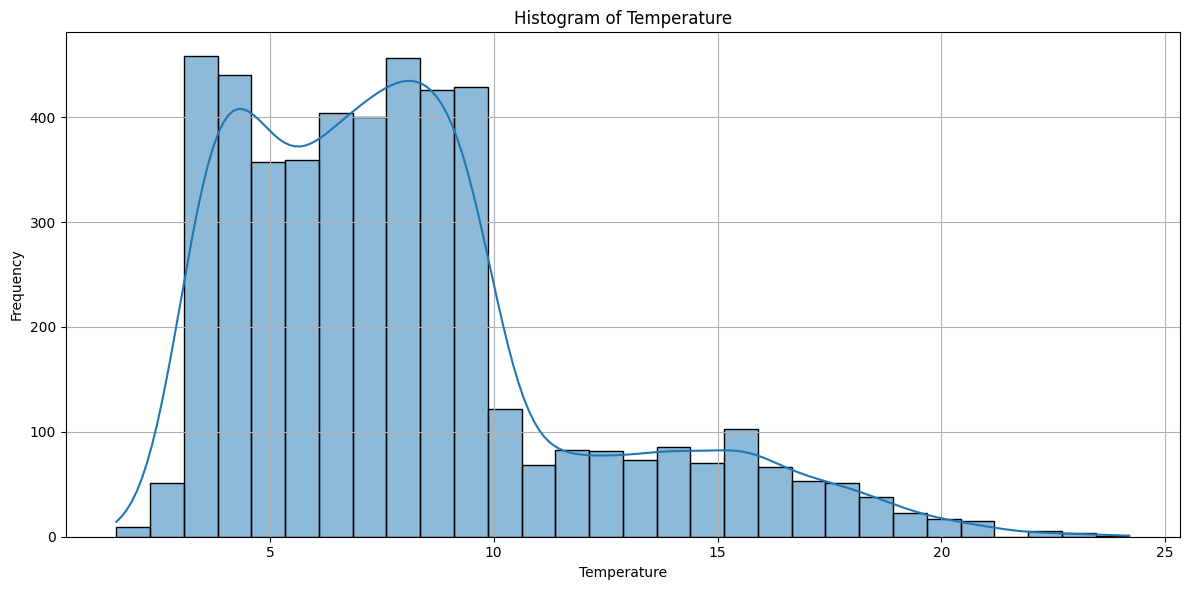

count    4749.000000
mean        8.013887
std         3.863948
min         1.570000
25%         5.020000
50%         7.400000
75%         9.460000
max        24.200000
Name: temperatura, dtype: float64

Skewness: 1.13
Kurtosis: 1.01


In [6]:

import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

# Load the file
df =  pd.read_csv(io.BytesIO(uploaded['TS_d_1.csv']))
temperature_column = df.columns[1]

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df[temperature_column], kde=True, bins=30)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display some basic statistics
print(df[temperature_column].describe())

# Calculate skewness and kurtosis
skewness = df[temperature_column].skew()
kurtosis = df[temperature_column].kurtosis()
print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")


R/ Los datos tienen una distribución sesgada hacia la derecha, el valor del sesgo Skewness indica que los datos tienen tendencia a temperaturas más bajas. La moda es al rededor de los 5 grados.

### 1.8 **(4 puntos)**
- Agrupe los datos de la variable serie de manera Anual, y muestre los Boxplot de cada año.
1. ¿Cómo se interpreta un gráfico Boxplot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?

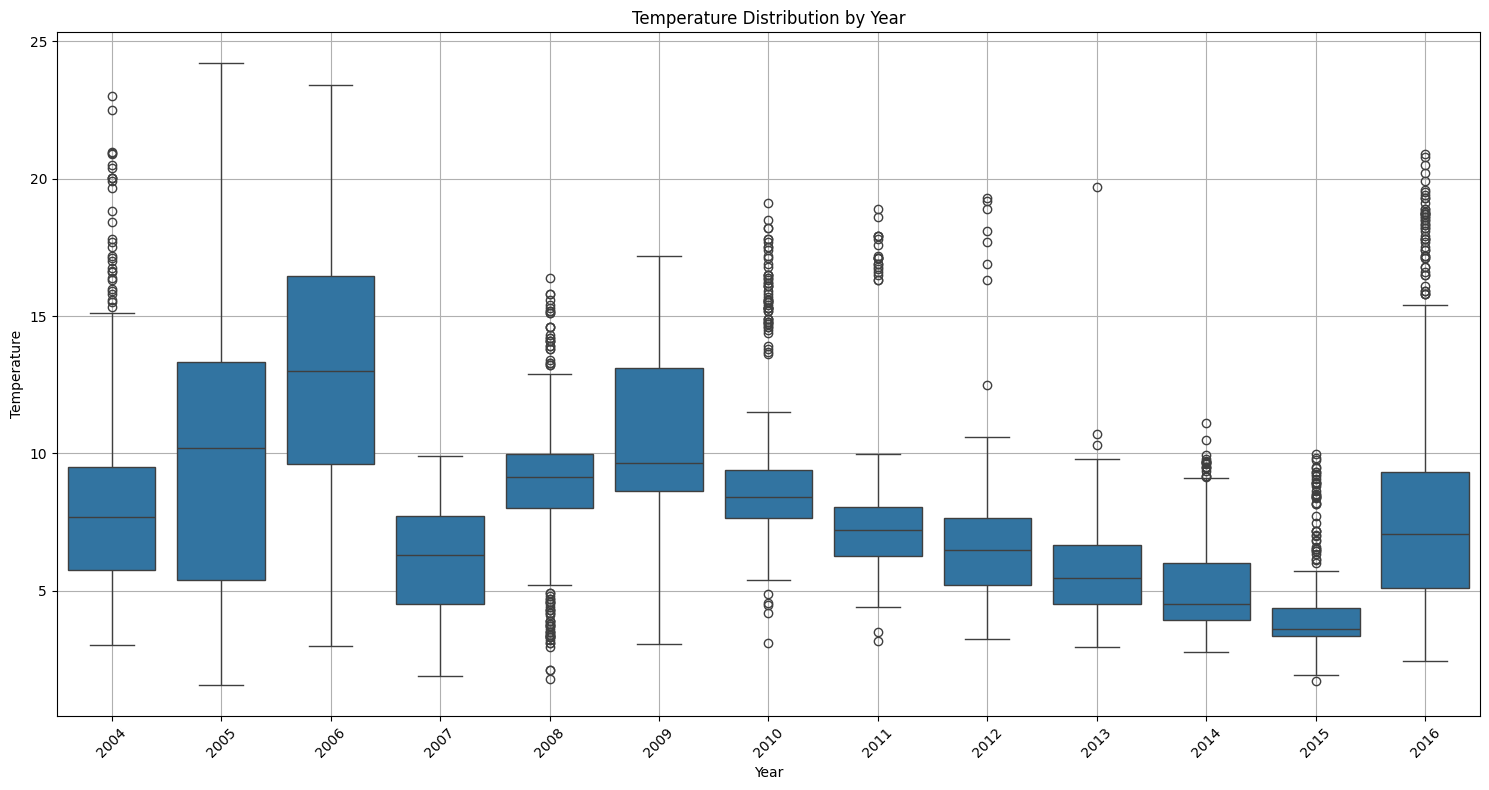

      count       mean       std   min     25%     50%      75%    max
Year                                                                  
2004  366.0   8.364891  3.956779  3.01  5.7425   7.670   9.4900  23.00
2005  365.0   9.824630  4.433160  1.57  5.3900  10.200  13.3400  24.20
2006  365.0  13.070849  4.355116  3.00  9.6000  13.000  16.4600  23.43
2007  365.0   6.193973  1.926141  1.90  4.5000   6.300   7.7000   9.90
2008  366.0   9.020437  2.709773  1.80  8.0100   9.140   9.9800  16.40
2009  365.0  10.626658  2.626314  3.04  8.6400   9.640  13.1000  17.20
2010  365.0   9.327589  3.096708  3.11  7.6500   8.420   9.3900  19.10
2011  365.0   7.654932  2.590486  3.17  6.2600   7.210   8.0400  18.90
2012  366.0   6.707705  2.198870  3.24  5.2200   6.465   7.6425  19.30
2013  365.0   5.778356  1.761717  2.93  4.5200   5.460   6.6800  19.70
2014  365.0   5.141890  1.727485  2.78  3.9300   4.510   6.0100  11.10
2015  365.0   4.189014  1.555063  1.72  3.3300   3.620   4.3800   9.98
2016  

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt

# Load the file
df =  pd.read_csv(io.BytesIO(uploaded['TS_d_1.csv']))

date_column = df.columns[0]
temperature_column = df.columns[1]

# Convert the date column to datetime type
df[date_column] = pd.to_datetime(df[date_column],format='mixed', errors='coerce', dayfirst=True)

# Extract year from the date
df['Year'] = df[date_column].dt.year

# Create the boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Year', y=temperature_column, data=df)
plt.title('Temperature Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Display summary statistics for each year
yearly_stats = df.groupby('Year')[temperature_column].describe()
print(yearly_stats)

# Perform a statistical test for trend
from scipy import stats

years = df['Year'].unique()
yearly_means = df.groupby('Year')[temperature_column].mean().values
correlation, p_value = stats.pearsonr(years, yearly_means)

print(f"\nCorrelation between Year and Mean Temperature: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")


R/ Se interpreta d ela siguiente manera: - La caja muestra el rango intercuartílico (IQR), donde el 50% de los datos se concentran. La línea dentro de la caja es la mediana (valor central).

Las líneas (bigotes) indican el rango donde se encuentran la mayoría de los datos, mientras que los círculos representan outliers es decir, valores atípicos que caen fuera de este rango esperado. En este caso, el gráfico revela que las temperaturas en general disminuyeron con el tiempo, con una variabilidad más alta en los primeros años y estabilización en los años posteriores.

Sobre el comportamiento de los datos se puede decir que:
Hay valores extremos en 2004, 2005 y 2016. A lo largo de los años, la mediana de las temperaturas disminuye, especialmente después de 2005, lo que indica una tendencia general a temperaturas más bajas.


### 1.9 **(4 puntos)**
- Muestre el Lag Scatter plot de la variable series.
1. ¿Cómo se interpreta un Lag Scatter plot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


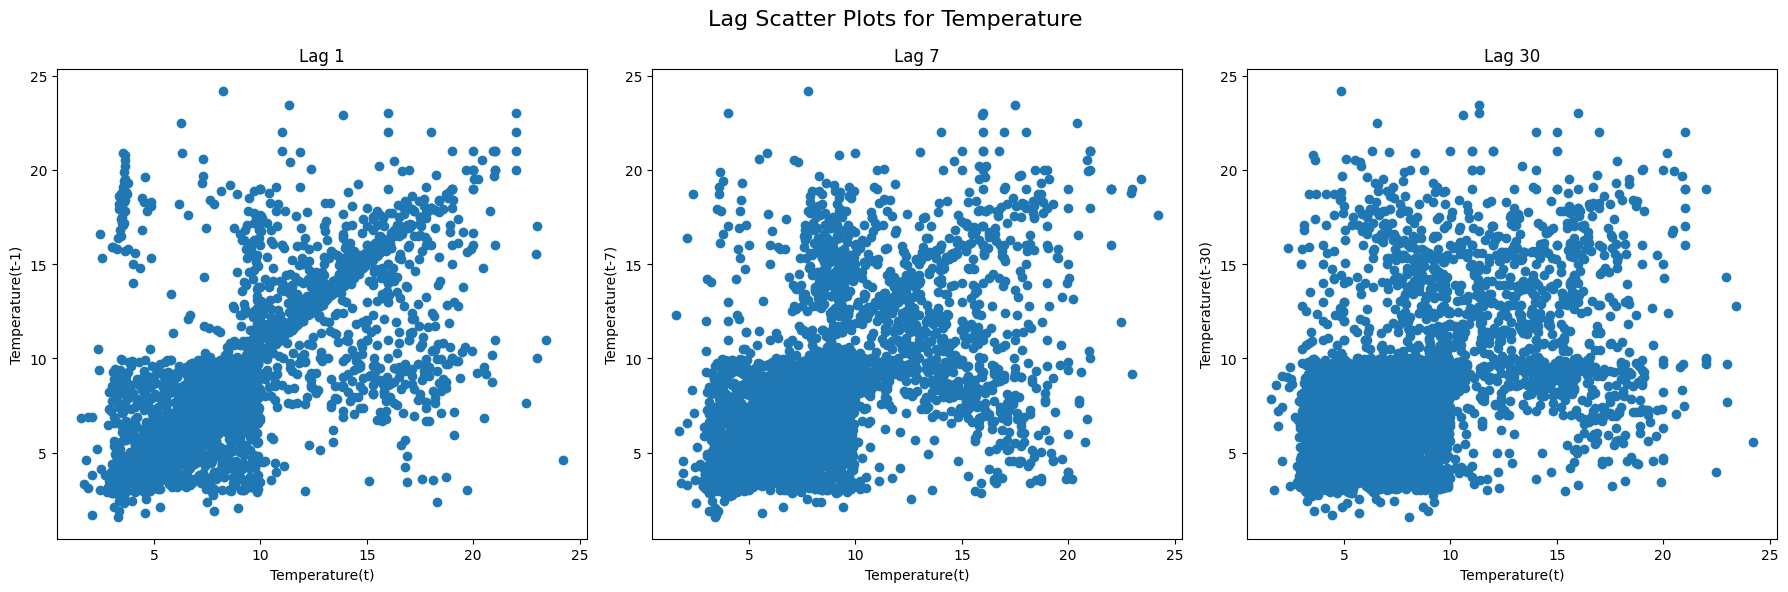

Autocorrelation at lag 1: 0.7190
Autocorrelation at lag 7: 0.5693
Autocorrelation at lag 30: 0.4560


In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
# Load the file
df =  pd.read_csv(io.BytesIO(uploaded['TS_d_1.csv']))

date_column = df.columns[0]
temperature_column = df.columns[1]

# Convert the date column to datetime type and set it as index
df[date_column] = pd.to_datetime(df[date_column],format='mixed', errors='coerce', dayfirst=True)
df.set_index(date_column, inplace=True)

# Create lag scatter plots for lags 1, 7, and 30
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Lag Scatter Plots for Temperature', fontsize=16)

lag_values = [1, 7, 30]

for i, lag in enumerate(lag_values):
    lag_plot(df[temperature_column], lag=lag, ax=axes[i])
    axes[i].set_title(f'Lag {lag}')
    axes[i].set_xlabel(f'Temperature(t)')
    axes[i].set_ylabel(f'Temperature(t-{lag})')

plt.tight_layout()
plt.show()

# Calculate and print autocorrelation for these lags
from statsmodels.tsa.stattools import acf

autocorrelations = acf(df[temperature_column], nlags=max(lag_values))

for lag in lag_values:
    print(f"Autocorrelation at lag {lag}: {autocorrelations[lag]:.4f}")

R/ Compara los valores de una variable en el tiempo actual (t) con sus valores en un periodo de tiempo anterior (t-lag), donde "lag" representa el número de pasos temporales entre los dos puntos.

Si los puntos en el gráfico se agrupan de forma cercana a una línea, esto indica una fuerte correlación entre los valores actuales y los valores en el periodo de tiempo anterior. Cuanto más dispersos estén los puntos, menor será la autocorrelación y, por tanto, menor la relación entre los valores en esos momentos.

Sobre el comportamiento: Poseen dependencia temporal entre los valores de temperatura en tiempos cercanos (lag 1 y lag 7), lo que indica que la temperatura de un día está fuertemente influenciada por las temperaturas recientes. Pero, a medida que se incrementa el lag (por ejemplo, lag 30), la correlación disminuye, lo que sugiere que la influencia de las temperaturas más antiguas en las actuales es mucho menor, aunque no completamente insignificante.

### 1.10 **(4 puntos)**
- Muestre el gráfico Autocorrelación de la variable series.
1. ¿Cómo se interpreta este tipo de gráficos?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


<Figure size 1200x600 with 0 Axes>

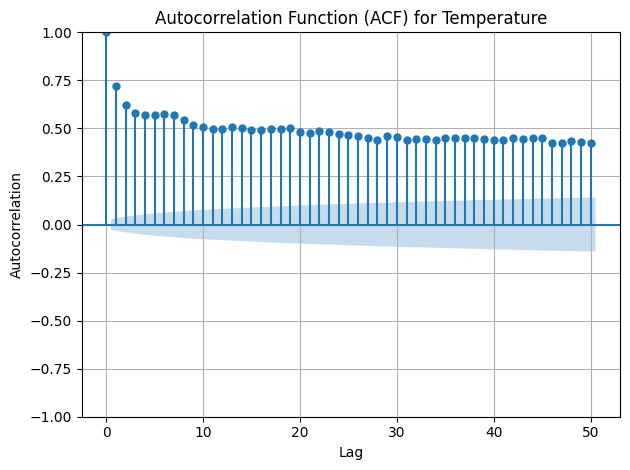

Key Autocorrelations:
Lag 1: 0.7190
Lag 7: 0.5693
Lag 30: 0.4560


In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
# Load the file
df =  pd.read_csv(io.BytesIO(uploaded['TS_d_1.csv']))

date_column = df.columns[0]
temperature_column = df.columns[1]

# Convert the date column to datetime type and set it as index
df[date_column] = pd.to_datetime(df[date_column],format='mixed', errors='coerce', dayfirst=True)
df.set_index(date_column, inplace=True)

# Create ACF plot
plt.figure(figsize=(12, 6))
plot_acf(df[temperature_column], lags=50, alpha=0.05)
plt.title('Autocorrelation Function (ACF) for Temperature')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print some key autocorrelations
autocorrelations = acf(df[temperature_column], nlags=50)

print("Key Autocorrelations:")
for lag in [1, 7, 30, 365]:
    if lag < len(autocorrelations):
        print(f"Lag {lag}: {autocorrelations[lag]:.4f}")

R/ Mide la correlación de una serie temporal consigo misma en diferentes retardos (lags). En el gráfico, cada punto en el eje X representa un lag (retardo), mientras que el eje Y muestra el valor de la autocorrelación para ese lag.

Las líneas punteadas horizontales representan los intervalos de confianza. Cualquier punto de autocorrelación fuera de estos límites se considera estadísticamente importante. Si los puntos caen dentro de las líneas de confianza, su autocorrelación es lo suficientemente baja como para considerarla no significativa.

# Parte 2.  Diferenciación

1. Luego, **utilizando el archivo 'TS_d_2.csv'** realice la presente sección.
1. Complete en celdas de código y/o texto según convenga.
1. Documente bien su código.

### 2.1 **(4 puntos)**
- Cargue el archivo proporcionado y muestre los 10 primeros registros.

In [ ]:
import pandas as pd
import io
# Load the file
df =  pd.read_csv(io.BytesIO(uploaded['TS_d_2.csv']))


# Show the first five records
print("First ten records:")
print(df.head(n=10))

# Show the type of data the series variable is
print("\nData types of each column:")
print(df.dtypes)

# If you want to check the type of a specific column named 'fecha', you can use:
if 'fecha' in df.columns:
    print("\nType of 'fecha' column:")
    print(type(df['fecha']))
    print(df['fecha'].dtype)
else:
    print("\n'fecha' column not found in the dataset")

First ten records:
       fecha  humedad
0   1/1/2000     0.89
1   1/2/2000     0.86
2   1/3/2000     0.89
3   1/4/2000     0.83
4   1/5/2000     0.83
5   1/6/2000     0.85
6   1/7/2000     0.95
7   1/8/2000     0.89
8   1/9/2000     0.82
9  1/10/2000     0.72

Data types of each column:
fecha       object
humedad    float64
dtype: object

Type of 'fecha' column:
<class 'pandas.core.series.Series'>
object


### 2.2 **(4 puntos)**

- Aplique el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)
- Explique los resultados

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from statsmodels.tsa.stattools import adfuller

# Load the data
def load_data():
    df = pd.read_csv(io.BytesIO(uploaded['TS_d_2.csv']))
    df['date'] = pd.to_datetime(df['fecha'],format='mixed', errors='coerce', dayfirst=True)
    df.set_index('date', inplace=True)
    return df

# Perform ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return result

# Interpret ADF test results
def interpret_adf_results(result, significance_level=0.05):
    adf_statistic, p_value, _, _, critical_values, _ = result

    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')

    if p_value <= significance_level:
        print(f"\nAs the p-value ({p_value}) is less than or equal to the significance level ({significance_level}),")
        print("we reject the null hypothesis.")
        print("Conclusion: The time series is stationary.")
    else:
        print(f"\nAs the p-value ({p_value}) is greater than the significance level ({significance_level}),")
        print("we fail to reject the null hypothesis.")
        print("Conclusion: The time series may be non-stationary.")

    if adf_statistic < critical_values['5%']:
        print("\nAlso, the ADF statistic is less than the 5% critical value.")
        print("This further supports that the series is stationary.")
    else:
        print("\nHowever, the ADF statistic is greater than the 5% critical value.")
        print("This suggests the series might be non-stationary.")

# Plot the time series
def plot_series(series):
    plt.figure(figsize=(12, 6))
    plt.plot(series)
    plt.title('Humidity Time Series')
    plt.xlabel('Date')
    plt.ylabel('Humidity')
    plt.show()

# Main function
def main():
    # Load data
    df = load_data()

    # Plot the original series
    plot_series(df['humedad'])

    # Perform ADF test
    result = adf_test(df['humedad'])

    # Interpret and print results
    interpret_adf_results(result)

if __name__ == "__main__":
    main()

KeyError: 'TS_d_2.csv'

### 2.3 **(4 puntos)**

- Aplique la "Diferenciación" a la serie, y al resultado vuelva a aplicarle el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)
- Explique los resultados

Results for the original series:
ADF Statistic: -6.069991800401606
p-value: 1.1570257195013473e-07
Critical Values:
   1%: -3.4586084859607156
   5%: -2.873972159235721
   10%: -2.57339565928848

As the p-value (1.1570257195013473e-07) is less than or equal to the significance level (0.05),
we reject the null hypothesis.
Conclusion: The time series is stationary.

Also, the ADF statistic is less than the 5% critical value.
This further supports that the series is stationary.

Results for the differentiated series:
ADF Statistic: -6.981581311995548
p-value: 8.166131371726971e-10
Critical Values:
   1%: -3.460018927623594
   5%: -2.8745897386146817
   10%: -2.57372514086348

As the p-value (8.166131371726971e-10) is less than or equal to the significance level (0.05),
we reject the null hypothesis.
Conclusion: The time series is stationary.

Also, the ADF statistic is less than the 5% critical value.
This further supports that the series is stationary.


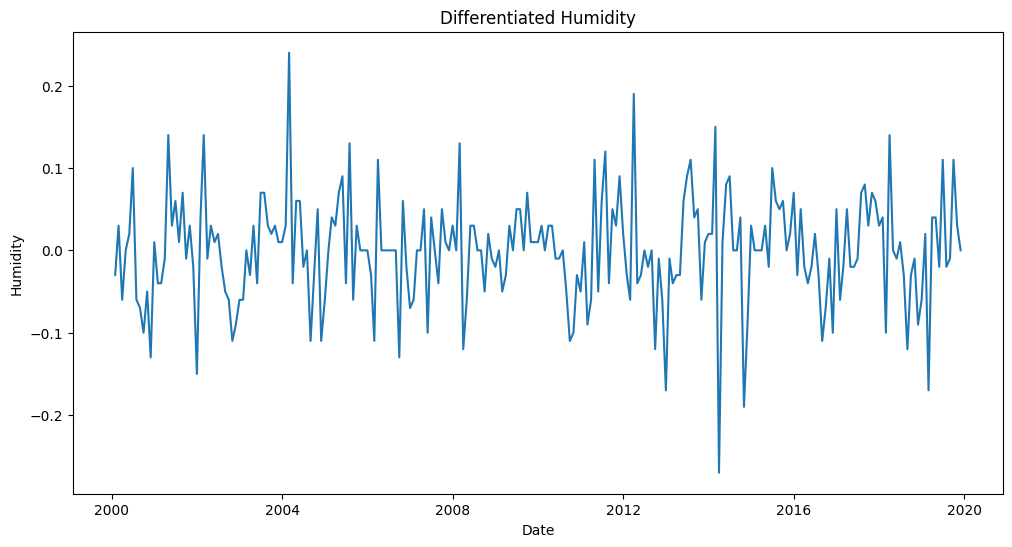

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import io

# Load the data
def load_data():
    df = pd.read_csv(io.BytesIO(uploaded['TS_d_2.csv']))
    df['date'] = pd.to_datetime(df['fecha'],format='mixed', errors='coerce', dayfirst=True)
    df.set_index('date', inplace=True)
    return df

# Perform ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return result

# Interpret ADF test results
def interpret_adf_results(result, significance_level=0.05):
    adf_statistic, p_value, _, _, critical_values, _ = result

    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')

    if p_value <= significance_level:
        print(f"\nAs the p-value ({p_value}) is less than or equal to the significance level ({significance_level}),")
        print("we reject the null hypothesis.")
        print("Conclusion: The time series is stationary.")
    else:
        print(f"\nAs the p-value ({p_value}) is greater than the significance level ({significance_level}),")
        print("we fail to reject the null hypothesis.")
        print("Conclusion: The time series may be non-stationary.")

    if adf_statistic < critical_values['5%']:
        print("\nAlso, the ADF statistic is less than the 5% critical value.")
        print("This further supports that the series is stationary.")
    else:
        print("\nHowever, the ADF statistic is greater than the 5% critical value.")
        print("This suggests the series might be non-stationary.")

# Plot the time series
def plot_series(series, title='Humidity Time Series'):
    plt.figure(figsize=(12, 6))
    plt.plot(series)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Humidity')
    plt.show()


# Main function
def main():
    # Load data
    df = load_data()

    # Original series
    print("Results for the original series:")
    original_result = adf_test(df['humedad'])
    interpret_adf_results(original_result)

    # Differentiate the series
    #df['diff_humidity'] = df['humedad'].diff().dropna()
    diff_humidity = df['humedad'].diff().dropna()
    # Differentiated series
    print("\nResults for the differentiated series:")
    diff_result = adf_test(diff_humidity)
    interpret_adf_results(diff_result)

    # Plot both series
    plot_series(diff_humidity,"Differentiated Humidity")

if __name__ == "__main__":
    main()

### 2.4 **(4 puntos)**

- ¿Esta serie requería Diferenciación o no?  Explique el gráfico generado, ¿por qué sé mira así relacionado con la necesidad o no de diferenciación?

In [ ]:
Dado que la serie temporal es estacionaria tanto antes como después de la diferenciación, no es necesaria la diferenciación. También se puede demostrar mediante los dos gráficos.

# Parte 3.  ARIMA

1. Luego, **utilizando el archivo 'TS_d_3.csv'** realice la presente sección.
1. Complete en celdas de código y/o texto según convenga.
1. Documente bien su código.

### 3.1 **(4 puntos)**

- Explique en qué consiste ARIMA.

In [ ]:
ARIMA es un método estadístico popular que se utiliza para la previsión de series temporales. Combina tres componentes (autorregresivo, AR), integrado y de media móvil (MA) para modelar y predecir puntos futuros en una serie temporal.
La parte AR del modelo indica que la variable en evolución (la serie temporal) depende linealmente de sus propios valores anteriores. Básicamente, el modelo intenta predecir el valor actual de la serie basándose en valores pasados.
La parte integrada se refiere a la diferenciación de los datos para hacer que la serie temporal sea estacionaria (es decir, garantizar que la media, la varianza y la estructura de autocorrelación de la serie permanezcan constantes a lo largo del tiempo). Este proceso elimina las tendencias o la estacionalidad de los datos.
La parte MA modela la relación entre una observación y un error residual de un modelo de media móvil aplicado a pasos de tiempo anteriores. El modelo depende de errores de previsión pasados ​​en lugar de valores pasados ​​reales.

### 3.2 **(4 puntos)**

- Cargue el archivo y use los gráficos que considere prudente para ver cómo se comportan los datos
- Comente sus conclusiones

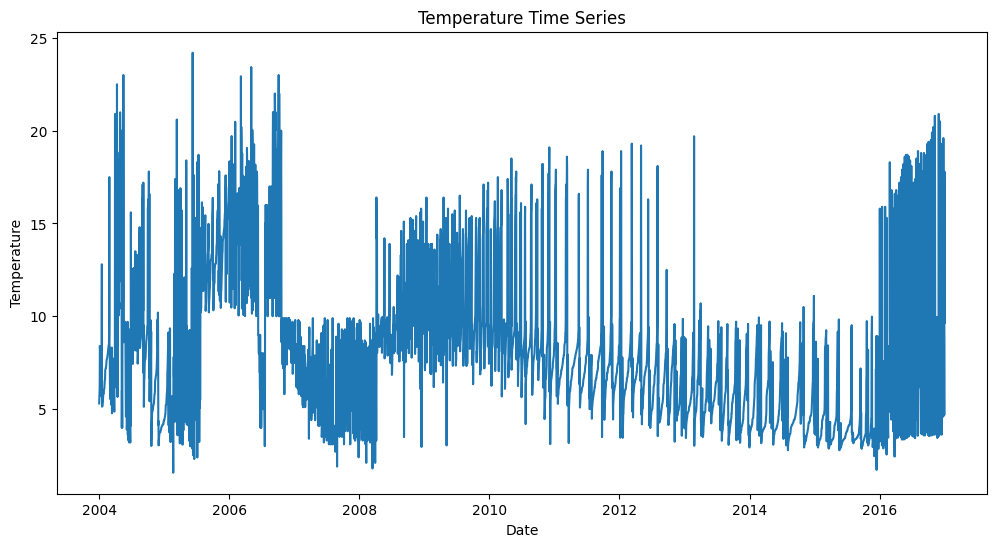

ADF Statistic: -4.441424588911883
p-value: 0.00025054115607100184
Critical Values:
   1%: -3.431737081235483
   5%: -2.8621529318219108
   10%: -2.567096265742128

As the p-value (0.00025054115607100184) is less than or equal to the significance level (0.05),
we reject the null hypothesis.
Conclusion: The time series is stationary.

Also, the ADF statistic is less than the 5% critical value.
This further supports that the series is stationary.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from statsmodels.tsa.stattools import adfuller

# Load the data
def load_data():
    df = pd.read_csv(io.BytesIO(uploaded['TS_d_3.csv']))
    df['date'] = pd.to_datetime(df['fecha'],format='mixed', errors='coerce', dayfirst=True)
    df.set_index('date', inplace=True)
    return df

# Perform ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return result

# Interpret ADF test results
def interpret_adf_results(result, significance_level=0.05):
    adf_statistic, p_value, _, _, critical_values, _ = result

    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')

    if p_value <= significance_level:
        print(f"\nAs the p-value ({p_value}) is less than or equal to the significance level ({significance_level}),")
        print("we reject the null hypothesis.")
        print("Conclusion: The time series is stationary.")
    else:
        print(f"\nAs the p-value ({p_value}) is greater than the significance level ({significance_level}),")
        print("we fail to reject the null hypothesis.")
        print("Conclusion: The time series may be non-stationary.")

    if adf_statistic < critical_values['5%']:
        print("\nAlso, the ADF statistic is less than the 5% critical value.")
        print("This further supports that the series is stationary.")
    else:
        print("\nHowever, the ADF statistic is greater than the 5% critical value.")
        print("This suggests the series might be non-stationary.")

# Plot the time series
def plot_series(series):
    plt.figure(figsize=(12, 6))
    plt.plot(series)
    plt.title('Temperature Time Series')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.show()

# Main function
def main():
    # Load data
    df = load_data()

    # Plot the original series
    plot_series(df['temperatura'])

    # Perform ADF test
    result = adf_test(df['temperatura'])

    # Interpret and print results
    interpret_adf_results(result)

if __name__ == "__main__":
    main()

### 3.3 **(4 puntos)**

- Analice si requiere hacer diferenciación o no. Explique

In [ ]:
It is not necessary to apply differencing, as the series has been determined to be stationary according to the ADF test results.

### 3.4 **(4 puntos)**

- Haga forecast (similar a las últimas secciones de ese capítulo), con un train de 80% y un test de 20% (no olvide que son series temporales, no datos i.i.d.)

RMSE: 4.190719634003319

Predictions:
Date: 2014-05-27, Actual: 3.91, Predicted: 3.86
Date: 2014-05-28, Actual: 3.91, Predicted: 3.85
Date: 2014-05-29, Actual: 3.92, Predicted: 3.85
Date: 2014-05-30, Actual: 3.92, Predicted: 3.85
Date: 2014-05-31, Actual: 3.94, Predicted: 3.86
Date: 2014-06-01, Actual: 3.97, Predicted: 3.86
Date: 2014-06-02, Actual: 4.06, Predicted: 3.86
Date: 2014-06-03, Actual: 4.06, Predicted: 3.86
Date: 2014-06-04, Actual: 4.08, Predicted: 3.86
Date: 2014-06-05, Actual: 4.11, Predicted: 3.86
Date: 2014-06-06, Actual: 4.17, Predicted: 3.86
Date: 2014-06-07, Actual: 4.24, Predicted: 3.86
Date: 2014-06-08, Actual: 4.28, Predicted: 3.86
Date: 2014-06-09, Actual: 4.36, Predicted: 3.86
Date: 2014-06-10, Actual: 4.43, Predicted: 3.86
Date: 2014-06-11, Actual: 4.44, Predicted: 3.86
Date: 2014-06-12, Actual: 4.59, Predicted: 3.86
Date: 2014-06-13, Actual: 4.64, Predicted: 3.86
Date: 2014-06-14, Actual: 4.72, Predicted: 3.86
Date: 2014-06-15, Actual: 4.92, Predicted: 3.86
Da

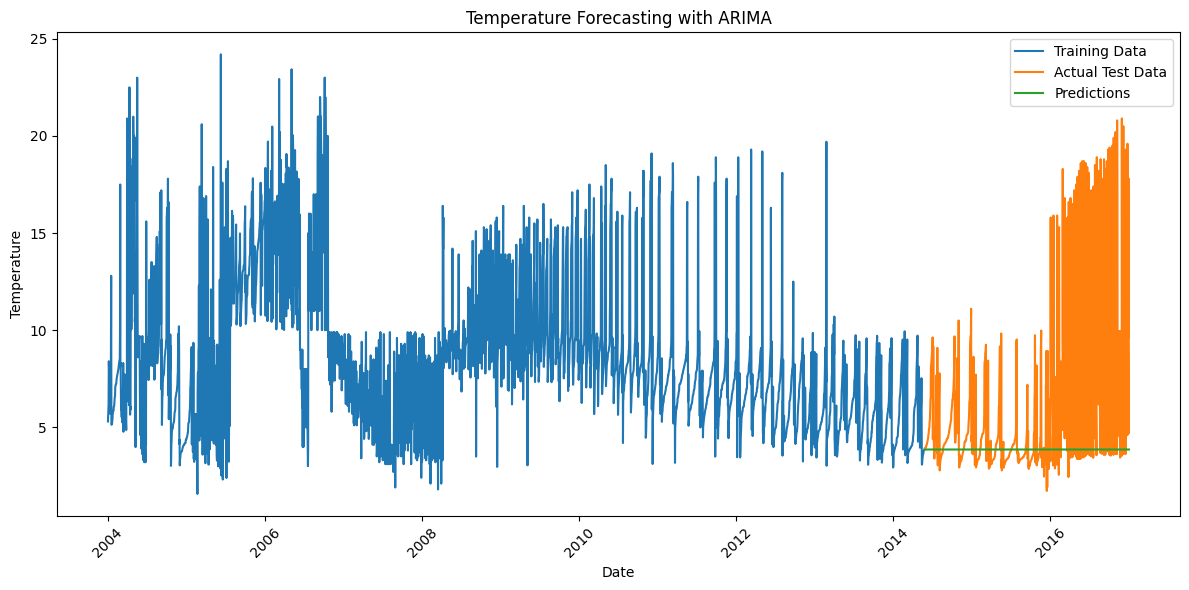

In [10]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA  # Cambiado AutoReg por ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import io

# Cargar el archivo CSV
df = pd.read_csv(io.BytesIO(uploaded['TS_d_3.csv']))

# Convertir 'fecha' a datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='mixed', errors='coerce', dayfirst=True)

# Establecer 'fecha' como índice
df.set_index('fecha', inplace=True)

# Preparar los datos
data = df['temperatura'].values
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Ajustar el modelo ARIMA
# order=(p,d,q): p=rezagos, d=diferenciación, q=media móvil
model = ARIMA(train, order=(5,1,0))  # Ajuste simple del modelo ARIMA
model_fit = model.fit()

# Hacer predicciones
predictions = model_fit.forecast(steps=len(test))

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'RMSE: {rmse}')

# Imprimir predicciones en formato de texto
print("\nPredictions:")
for date, actual, predicted in zip(df.index[train_size:], test, predictions):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Actual: {actual:.2f}, Predicted: {predicted:.2f}")

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size], train, label='Training Data')
plt.plot(df.index[train_size:], test, label='Actual Test Data')
plt.plot(df.index[train_size:], predictions, label='Predictions')
plt.title('Temperature Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3.5 **(4 puntos)**

- Grafique el predicho versus el real y comente sus conclusiones.

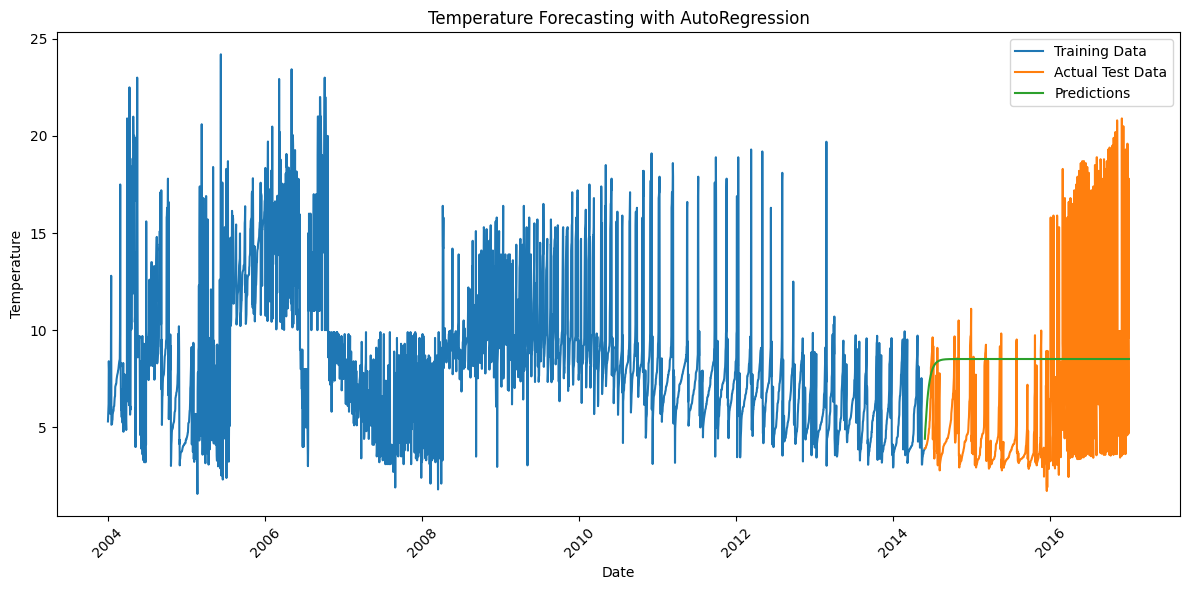

# Parte 4.  Regresión lineal y breve diseño experimental

**Se le suministra un archivo llamado TS_d_3.csv**.  

### 4.1 **(4 puntos)**
- Cargue el archivo en el orden en que vienen los datos y solo deje la columna temperatura.
- Muestre cuántas filas tiene el conjunto de datos.




In [ ]:
import pandas as pd
import io
# Load the CSV file
df = pd.read_csv(io.BytesIO(uploaded['TS_d_3.csv']))


temperature_data = df[['temperatura']]

# Display the first few rows to verify the data
print(temperature_data.head())

# Show the number of rows in the dataset
num_rows = len(temperature_data)
print(f"The dataset has {num_rows} rows.")

   temperatura
0          5.3
1          5.6
2          5.9
3          6.2
4          8.4
The dataset has 4749 rows.


### 4.2 **(5 puntos)**

- Como es solo una serie temporal, divida entre X_train y X_test (70% y 30%). Note que por ahora no tiene y (ni y_train, ni y_test)
- Muestre los tres primeros registros.


First three records:
            temperatura
fecha                  
2004-01-01          5.3
2004-01-02          5.6
2004-01-03          5.9


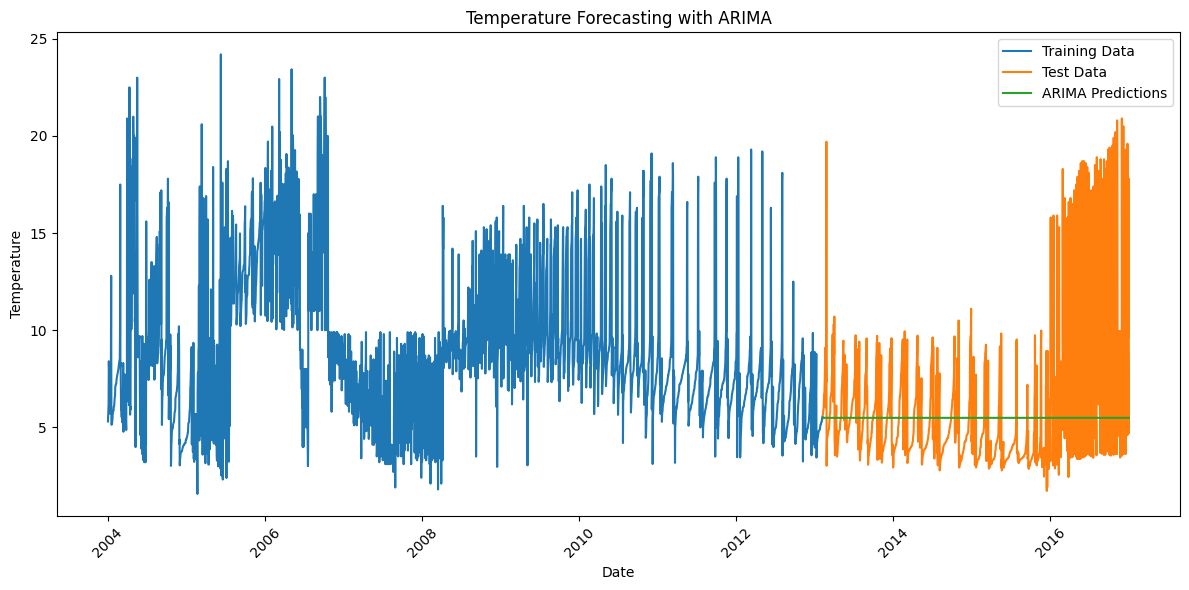


First few predictions:
[5.47611507 5.46570676 5.47531658 5.48735787 5.49231492]

Actual vs Predicted (first few points):
Actual: 5.62, Predicted: 5.48
Actual: 5.66, Predicted: 5.47
Actual: 5.77, Predicted: 5.48
Actual: 5.91, Predicted: 5.49
Actual: 5.91, Predicted: 5.49


In [ ]:
# create and evaluate a static autoregressive model
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the file
#file_path = r"C:\\Users\\arjun\\Downloads\\TP_1\\TS_d_3.csv"
df = pd.read_csv(io.BytesIO(uploaded['TS_d_3.csv']))

# Convert 'fecha' to datetime
df['fecha'] = pd.to_datetime(df['fecha'],format='mixed', errors='coerce', dayfirst=True)

# Set 'fecha' as the index
df.set_index('fecha', inplace=True)

# Ensure the data is sorted by date
df = df.sort_index()

# Display the first three records
print("First three records:")
print(df.head(3))

# Prepare the data
data = df['temperatura'].values

# Split the data into train (70%) and test (30%)
train_size = int(len(data) * 0.7)
X_train, X_test = data[:train_size], data[train_size:]

# Fit the ARIMA model
# Note: You might need to adjust the order (p,d,q) based on your data
model = ARIMA(X_train, order=(5,1,0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(X_test))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size], X_train, label='Training Data')
plt.plot(df.index[train_size:], X_test, label='Test Data')
plt.plot(df.index[train_size:], predictions, label='ARIMA Predictions')
plt.title('Temperature Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print some predictions
print("\nFirst few predictions:")
print(predictions[:5])

# Print actual vs predicted for the first few test points
print("\nActual vs Predicted (first few points):")
for actual, predicted in zip(X_test[:5], predictions[:5]):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

### 4.3 **(5 puntos)**

- Como todos los valores están en la misma escala y por si desea comprar el resultado con el ARIMA, no escale los datos. Ahora bien, entendiendo lo dicho anteriormente, puede escalar el X_train y X_test utilizando MinMaxScaler (pero cuidado al interpretar valores como el MSE).
- Indique qué decisión tomó y por qué.
- Muestre los tres primeros registros.




First three records:
            temperatura
fecha                  
2004-01-01          5.3
2004-01-02          5.6
2004-01-03          5.9

MSE (Unscaled): 10.2338
MSE (Scaled): 10.2338


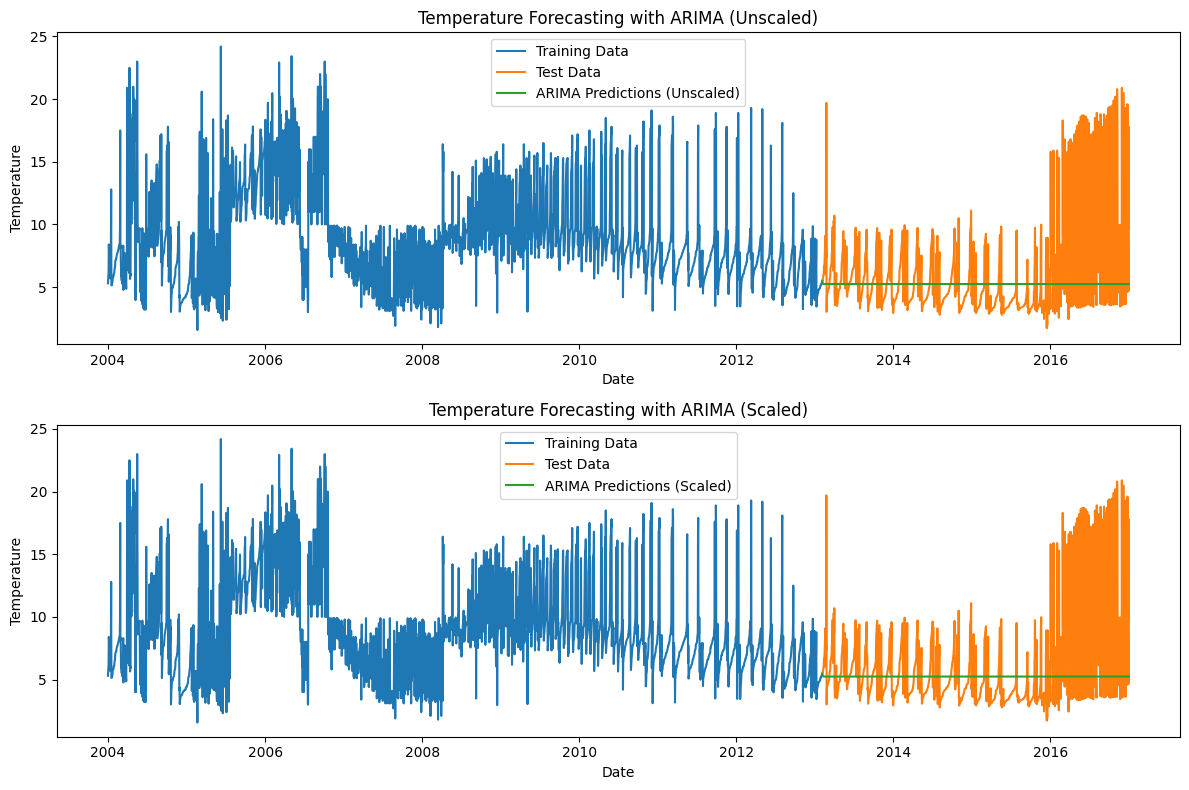


First few predictions (Unscaled vs Scaled):
Actual: 5.62, Predicted (Unscaled): 5.36, Predicted (Scaled): 5.36
Actual: 5.66, Predicted (Unscaled): 5.29, Predicted (Scaled): 5.29
Actual: 5.77, Predicted (Unscaled): 5.26, Predicted (Scaled): 5.26
Actual: 5.91, Predicted (Unscaled): 5.25, Predicted (Scaled): 5.25
Actual: 5.91, Predicted (Unscaled): 5.24, Predicted (Scaled): 5.24


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import io
# Load the file
#file_path = r"C:\\Users\\arjun\\Downloads\\TP_1\\TS_d_3.csv"

df = pd.read_csv(io.BytesIO(uploaded['TS_d_3.csv']))

# Convert 'fecha' to datetime
df['fecha'] = pd.to_datetime(df['fecha'],format='mixed', errors='coerce', dayfirst=True)

df.set_index('fecha', inplace=True)

# Ensure the data is sorted by date
df = df.sort_index()

# Display the first three records
print("First three records:")
print(df.head(3))

# Prepare the data
data = df['temperatura'].values

# Split the data into train (70%) and test (30%)
train_size = int(len(data) * 0.7)
X_train, X_test = data[:train_size], data[train_size:]

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1)).flatten()
X_test_scaled = scaler.transform(X_test.reshape(-1, 1)).flatten()

# Function to fit ARIMA and make predictions
def arima_forecast(train, test):
    model = ARIMA(train, order=(1,1,1))
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test))
    return predictions

# Unscaled ARIMA
predictions_unscaled = arima_forecast(X_train, X_test)

# Scaled ARIMA
predictions_scaled = arima_forecast(X_train_scaled, X_test_scaled)

# Inverse transform the scaled predictions
predictions_scaled_inv = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

# Calculate MSE for both models
mse_unscaled = mean_squared_error(X_test, predictions_unscaled)
mse_scaled = mean_squared_error(X_test, predictions_scaled_inv)

print(f"\nMSE (Unscaled): {mse_unscaled:.4f}")
print(f"MSE (Scaled): {mse_scaled:.4f}")

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(df.index[:train_size], X_train, label='Training Data')
plt.plot(df.index[train_size:], X_test, label='Test Data')
plt.plot(df.index[train_size:], predictions_unscaled, label='ARIMA Predictions (Unscaled)')
plt.title('Temperature Forecasting with ARIMA (Unscaled)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index[:train_size], X_train, label='Training Data')
plt.plot(df.index[train_size:], X_test, label='Test Data')
plt.plot(df.index[train_size:], predictions_scaled_inv, label='ARIMA Predictions (Scaled)')
plt.title('Temperature Forecasting with ARIMA (Scaled)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()

plt.tight_layout()
plt.show()

# Print some predictions
print("\nFirst few predictions (Unscaled vs Scaled):")
for i in range(5):
    print(f"Actual: {X_test[i]:.2f}, Predicted (Unscaled): {predictions_unscaled[i]:.2f}, Predicted (Scaled): {predictions_scaled_inv[i]:.2f}")

### 4.4 **(5 puntos)**

- Utilizando la técnica de Lag Features, procese tanto el train como el test con los valores y un Lag=5 y ahora si va tener y_train y y_test, pues serán el siguiente periodo a predecir.
- Muestre los tres primeros registros de cada uno.




First three records:
            temperatura
fecha                  
2004-01-01          5.3
2004-01-02          5.6
2004-01-03          5.9


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



MSE: 19.5565


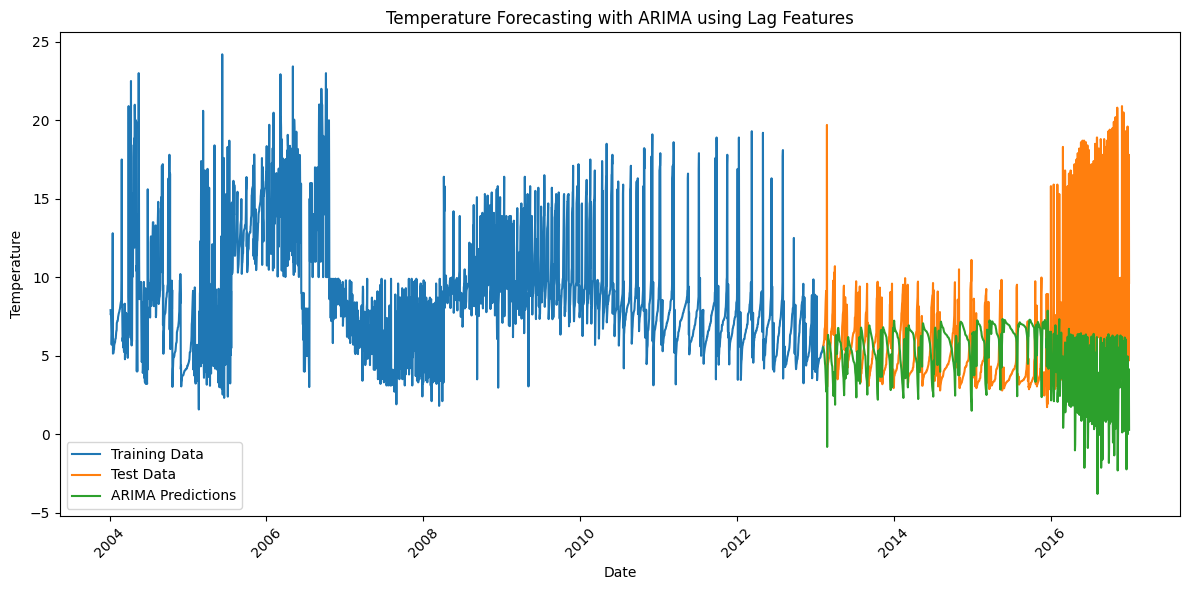


First few predictions:
Actual: 5.66, Predicted: 5.51
Actual: 5.77, Predicted: 5.43
Actual: 5.91, Predicted: 5.33
Actual: 5.91, Predicted: 5.21
Actual: 6.39, Predicted: 5.14


In [ ]:
# create and evaluate a static autoregressive model
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import io
# Load the file
#file_path = r"C:\\Users\\arjun\\Downloads\\TP_1\\TS_d_3.csv"
df = pd.read_csv(io.BytesIO(uploaded['TS_d_3.csv']))

# Convert 'fecha' to datetime
df['fecha'] = pd.to_datetime(df['fecha'],format='mixed', errors='coerce', dayfirst=True)

df.set_index('fecha', inplace=True)

# Ensure the data is sorted by date
df = df.sort_index()

# Display the first three records
print("First three records:")
print(df.head(3))

# Create lag features
def create_lag_features(data, lag=5):
    df_lag = pd.DataFrame(data)
    for i in range(1, lag+1):
        df_lag[f'lag_{i}'] = df_lag['temperatura'].shift(i)
    return df_lag.dropna()

# Create lag features
df_lag = create_lag_features(df['temperatura'])

# Split the data into features (X) and target (y)
X = df_lag.drop('temperatura', axis=1)
y = df_lag['temperatura']

# Split into train and test (70% train, 30% test)
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape y for ARIMA
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Function to fit ARIMA and make predictions
def arima_forecast(train, test):
    model = ARIMA(train, order=(1,1,1), exog=X_train_scaled)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test), exog=X_test_scaled)
    return predictions

# Fit ARIMA and make predictions
predictions = arima_forecast(y_train_reshaped, y_test_reshaped)

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print(f"\nMSE: {mse:.4f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_lag.index[:train_size], y_train, label='Training Data')
plt.plot(df_lag.index[train_size:], y_test, label='Test Data')
plt.plot(df_lag.index[train_size:], predictions, label='ARIMA Predictions')
plt.title('Temperature Forecasting with ARIMA using Lag Features')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print some predictions
print("\nFirst few predictions:")
for actual, predicted in zip(y_test[:5], predictions[:5]):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

### 4.5 **(5 puntos)**

- Vamos ahora a utilizar sklearn para calcular los pesos.
- Utilizando algún algoritmo de regresión de la biblioteca sklearn ajuste el modelo y calcule $y_{pred}$, calcule las métricas $R2$ y $MSE$ entre el $y_{pred}$ y el $y_{test}$.
- Comente los resultados obtenidos


Mean Squared Error: 7.8798
R-squared Score: 0.1998


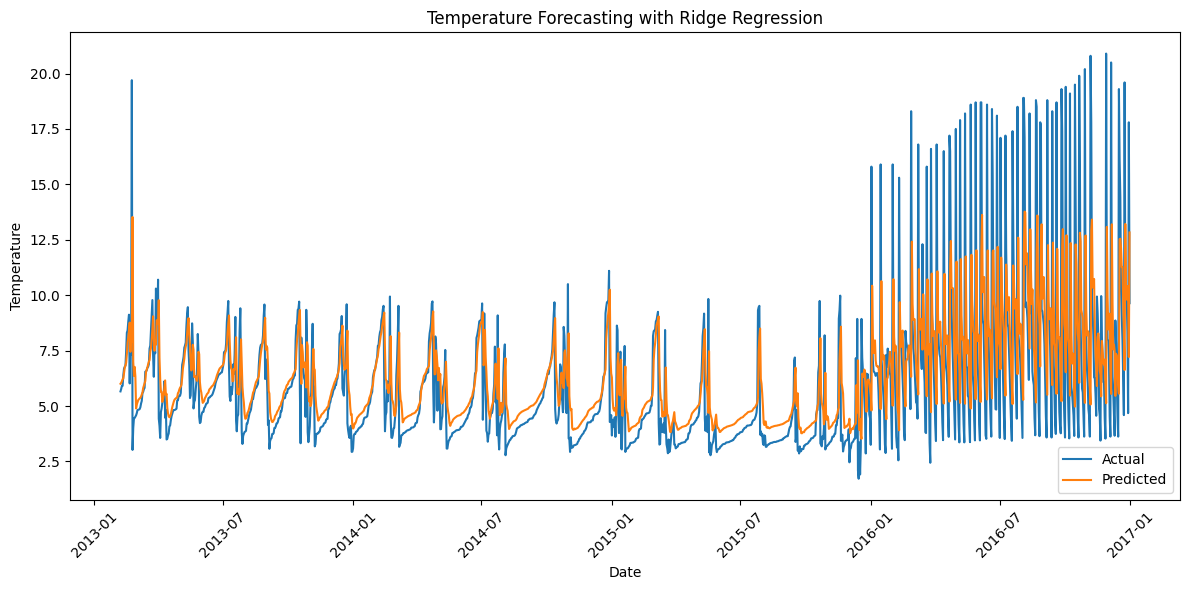


Feature Importance:
  feature  importance
0   lag_1   10.770948
1   lag_2    2.795597
3   lag_4    2.370370
4   lag_5    2.180604
2   lag_3    1.518861


In [ ]:
# create and evaluate a static autoregressive model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import io
# Load the file
#file_path = r"C:\\Users\\arjun\\Downloads\\TP_1\\TS_d_3.csv"
df = pd.read_csv(io.BytesIO(uploaded['TS_d_3.csv']))

# Convert 'fecha' to datetime
df['fecha'] = pd.to_datetime(df['fecha'],format='mixed', errors='coerce', dayfirst=True)

df.set_index('fecha', inplace=True)

# Ensure the data is sorted by date
df = df.sort_index()

# Create lag features
def create_lag_features(data, lag=5):
    df_lag = pd.DataFrame(data)
    for i in range(1, lag+1):
        df_lag[f'lag_{i}'] = df_lag['temperatura'].shift(i)
    return df_lag.dropna()

# Create lag features
df_lag = create_lag_features(df['temperatura'])

# Split the data into features (X) and target (y)
X = df_lag.drop('temperatura', axis=1)
y = df_lag['temperatura']

# Split into train and test (70% train, 30% test)
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Ridge Regression model
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge.fit(X_train_scaled, y_train)

# Make predictions
y_pred = ridge.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_lag.index[train_size:], y_test, label='Actual')
plt.plot(df_lag.index[train_size:], y_pred, label='Predicted')
plt.title('Temperature Forecasting with Ridge Regression')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(ridge.coef_)
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))